# Task 2 - Regression on the tabular data. General Machine Learning

You have a dataset (train.csv) that contains 53 anonymized features and a target
column. 

Your task is to build a model that predicts a target based on the proposed
features. Please provide predictions for the hidden_test.csv file. 

Target metric is RMSE.
The main goal is to provide github repository that contains:

- jupyter notebook with exploratory data analysis;
- train.py python script for model training;
- predict.py python script for model inference on test data;
- file with prediction results;
-  readme file that contains instructions about project setup and general guidance
around project;
   requirements.txt file.
Please provide documented code. Scripts (train.py and predict.py) should be able
to be executed from the terminal



---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Exploritary Data Analysis

---



In [2]:
train_df = pd.read_csv("./data/train.csv")
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [4]:
print(f"Number of duplicate rows: {train_df.duplicated().sum()}")

Number of duplicate rows: 0


No duplicates detected

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

From the first glimse we have anonimised data and can't actually tell what each columns describes in common sence. However, we can check for nulls, and ranges and types of the data

All columns are integers and so the `target` is. We will use a regression model to make predictions.

## Handling Missing Values

---

In [9]:
rows_with_null = train_df[train_df.isnull().any(axis=1)]
print(rows_with_null)


Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, target]
Index: []

[0 rows x 54 columns]


In [22]:
train_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

Dataframe doesn't have null values in the columns, which is great

## Correlation Analysis

---

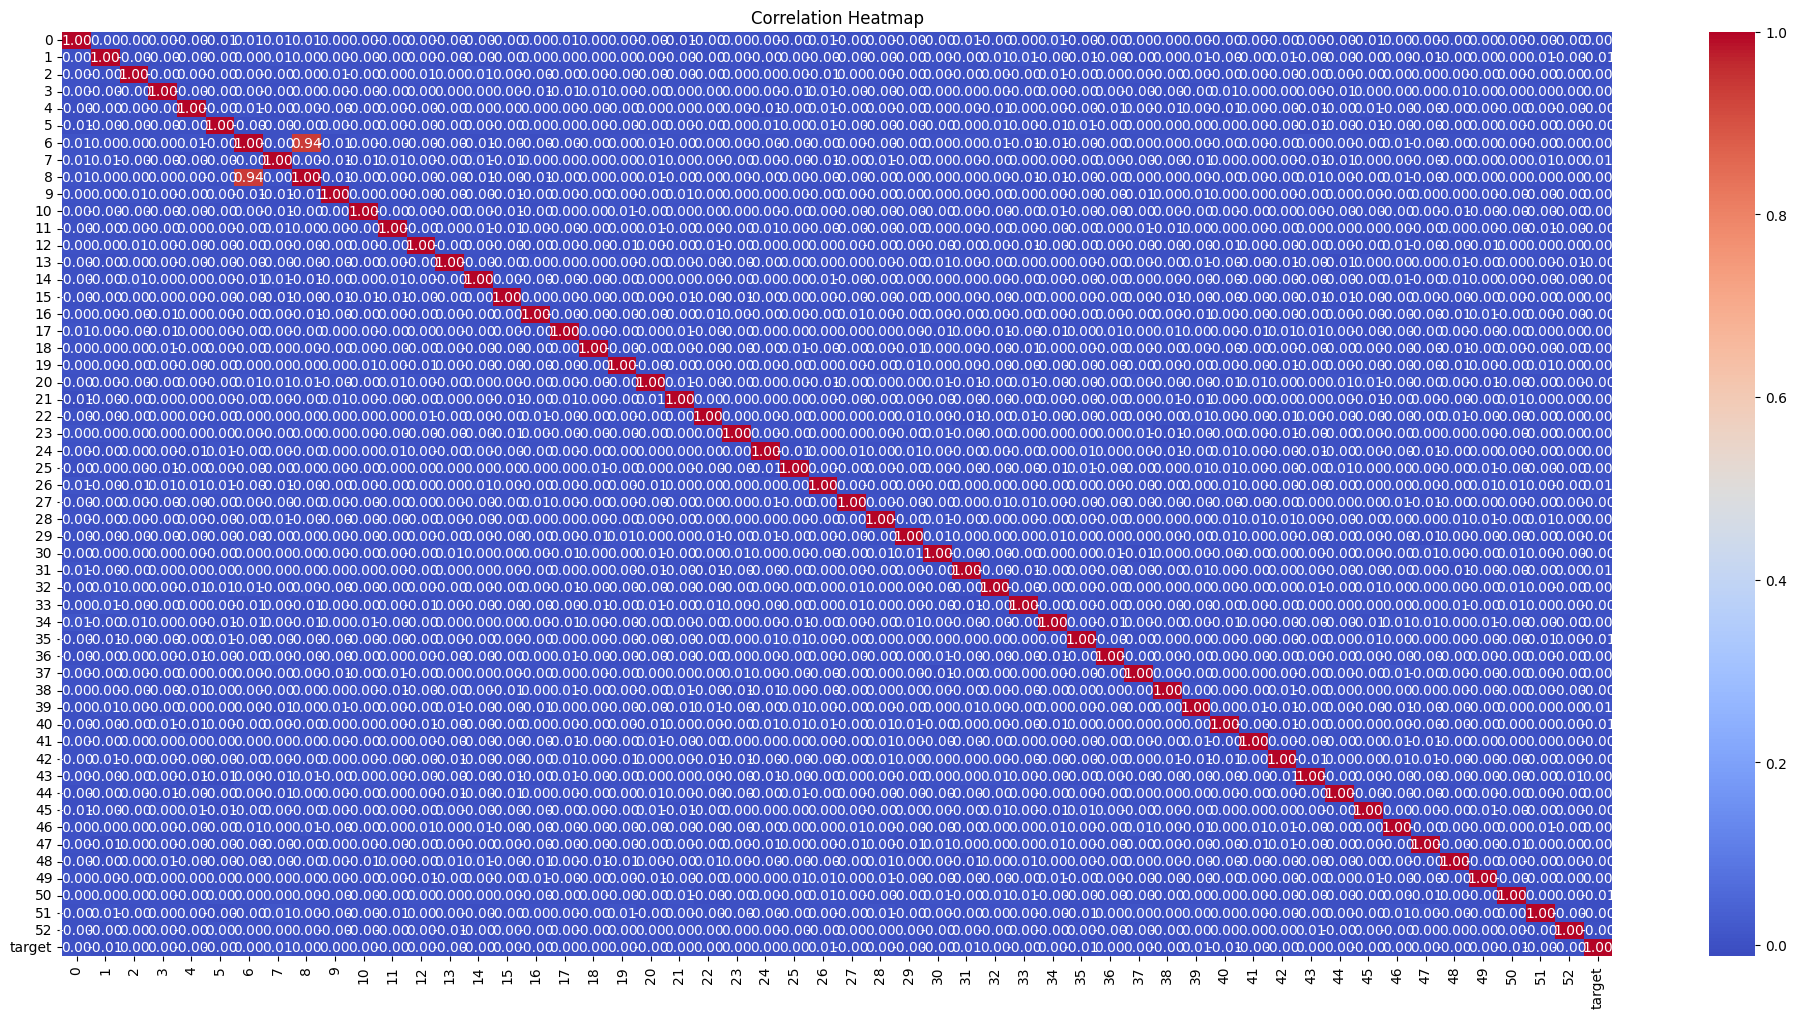

In [29]:
corr_matrix = train_df.corr()

plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Amazing! Features are uncorrelated
When features are uncorrelated, each feature provides unique information to the model. This can reduce redundancy and prevent overfitting, particularly in simpler models

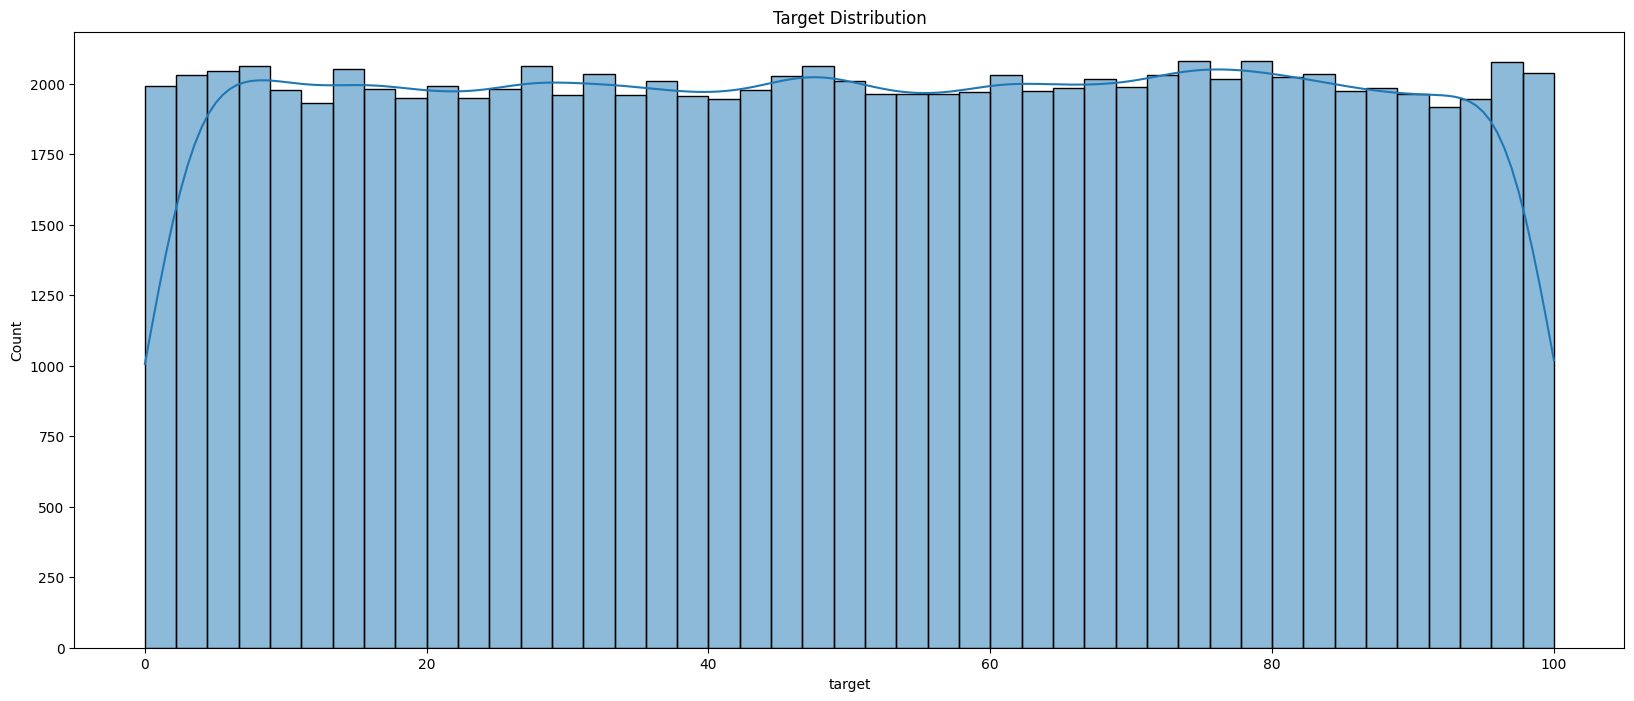

In [32]:
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.histplot(train_df['target'], kde=True)
plt.title("Target Distribution")
plt.show()


Target value has uniformal distribution, can't do any assumptions of the data

## Apply PCA to check principal components of data

---

Explained Variance Ratio: [0.03595116 0.01937223]
        PC1       PC2
0 -1.116352  0.388882
1  1.509581  0.791409
2  1.553286 -1.798073
3  1.570583 -1.659210
4  1.612145  0.677087


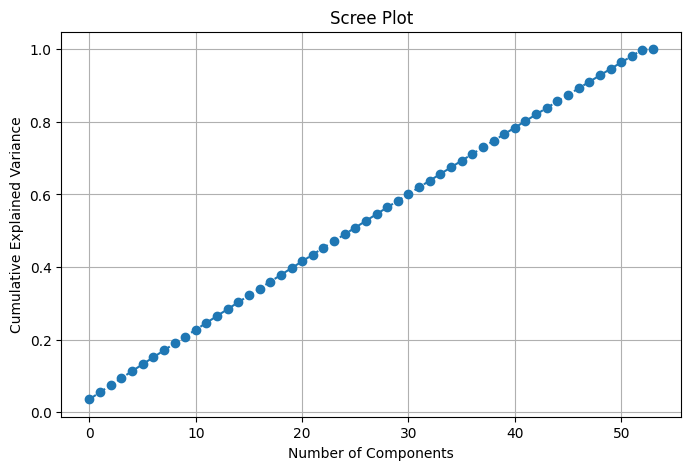

In [ ]:
X, y = train_df.drop(columns=["target"]), train_df[["target"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


print("Explained Variance Ratio:", pca.explained_variance_ratio_)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())


pca_full = PCA() 
pca_full.fit(scaled_data)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


In this case, the cumulative explained variance grows almost linearly, meaning each component contributes approximately the same amount of variance